## Referências:

http://localhost:8888/notebooks/notebooks/OneMax.ipynb

## Bibliotecas

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

## Parâmetros

In [ ]:
#------------------------------------
# Parâmetros do problema
#------------------------------------

TAM_TABULEIRO = 8

#------------------------------------
# Parâmetros do algoritmo
#------------------------------------

TAM_POP = 30
CX_PROB = 0.5
MUT_PROB = 0.1
TOURNAMENT_SIZE = 3
NUMERO_MAX_GERACOES = 1000

## Funções auxiliares

In [ ]:
#---------------------------------------------------------
def extrai_coordenadas_do_individuo(ind):
#---------------------------------------------------------
    lista_coordenadas = []
    for i in range(len(ind)):
        lista_coordenadas.append((i,ind[i]))
    return lista_coordenadas

#---------------------------------------------------------
def atualiza_coordenada(vlr_coord, operacao):
#---------------------------------------------------------
    
    novo_vlr_coord = -99
    
    if (operacao == "+") | (operacao == "adicao"):
        novo_vlr_coord = vlr_coord + 1
    elif (operacao == "-") | (operacao == "subtracao"):
        novo_vlr_coord = vlr_coord - 1
    else:
        print("Operacao invalida.")
        novo_vlr_coord = -97
    
    return novo_vlr_coord

#---------------------------------------------------------
def gera_matriz_coordenada(x,y,tamanho_tabuleiro,valor_posicao_rainha=0):
#---------------------------------------------------------

    limite_inferior = 0
    limite_superior = tamanho_tabuleiro - 1
    
    m = np.zeros((tamanho_tabuleiro, tamanho_tabuleiro), dtype = int)

    lista_operacoes = ["+","-"]

    for oper_i in lista_operacoes:
        for oper_j in lista_operacoes:
            
            i = atualiza_coordenada(x,oper_i)
            j = atualiza_coordenada(y,oper_j)
            
            while (i >= limite_inferior) & (i <= limite_superior) & (j >= limite_inferior) & (j <= limite_superior):
                m[i,j] = 1
                i = atualiza_coordenada(i,oper_i)
                j = atualiza_coordenada(j,oper_j)

    m[x,:] = 1
    m[:,y] = 1
    m[x,y] = valor_posicao_rainha
    
    return m


#---------------------------------------------------------
def gera_matriz_resultante(coords_ind):
#---------------------------------------------------------

    tamanho_do_tabuleiro = len(coords_ind)
    
    mr = np.zeros((tamanho_do_tabuleiro, tamanho_do_tabuleiro), dtype = int)

    for x,y in coords_ind:
        mr = mr + gera_matriz_coordenada(x,y,tamanho_do_tabuleiro,valor_posicao_rainha=0)
    
    return mr


#---------------------------------------------------------
def qtde_ataques_entre_rainhas(mr, coords_ind):
#---------------------------------------------------------
    qtde_ataques = 0
    for x,y in coords_ind:
        qtde_ataques = qtde_ataques + mr[x,y]
    return qtde_ataques


#---------------------------------------------------------
def fitness(qtde_ataques_entre_rainhas):
#---------------------------------------------------------
    b=0.2
    if qtde_ataques_entre_rainhas < 0:
        print("[fitness] Erro! Quantidade de ataques negativo!")
        f = -9999
    else:
        f = 1 / (1 + b*qtde_ataques_entre_rainhas)
        
    return f

#---------------------------------------------------------
def evaluate_fn(ind):
#---------------------------------------------------------
    coords_ind = extrai_coordenadas_do_individuo(ind)
    mr_teste = gera_matriz_resultante(coords_ind)
    q = qtde_ataques_entre_rainhas(mr_teste, coords_ind)
    ind_fitness = fitness(q)
    return ind_fitness, 

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("gene", random.randint, 0, TAM_TABULEIRO-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, n=TAM_TABULEIRO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
gene = toolbox.gene()
ind = toolbox.individual()
pop = toolbox.population(n=TAM_POP)

print("gene is of type %s and has value: %s" % (type(gene), gene))
print("ind is of type %s and contains %d genes: %s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

## Cálculo do _fitness_

In [ ]:
toolbox.register("evaluate", evaluate_fn)

In [ ]:
ind

In [ ]:
toolbox.evaluate(ind)

## Crossover

In [ ]:
toolbox.register("cross_over", tools.cxOnePoint)
# cxOnePoint: apenas inverte os genes.

Teste

In [ ]:
ind1 = toolbox.individual()
ind2 = toolbox.individual()

print("ind1 : " + str(ind1))
print("ind2 : " + str(ind2))

In [ ]:
ind1.fitness = toolbox.evaluate(ind1)
ind2.fitness = toolbox.evaluate(ind2)

print("fitness ind1 : " + str(ind1.fitness))
print("fitness ind2 : " + str(ind2.fitness))

In [ ]:
type(toolbox.cross_over(ind1, ind2))

In [ ]:
print("novo ind1 : " + str(ind1))
print("novo ind2 : " + str(ind2))

In [ ]:
del ind1.fitness
del ind2.fitness

In [ ]:
ind1.fitness = toolbox.evaluate(ind1)
ind2.fitness = toolbox.evaluate(ind2)

print("novo fitness ind1 : " + str(ind1.fitness))
print("novo fitness ind2 : " + str(ind2.fitness))

### Personalizado

In [ ]:
import random

def cxUmPontoCombinaIntervalo(ind1,ind2):
    novo_ind1 = ind1
    novo_ind2 = ind2
    #novos_genes = []

    i = ponto_de_corte
    for gene1, gene2 in zip(ind1[ponto_de_corte:],ind2[ponto_de_corte:]):
        novo_gene = random.randint(min(gene1,gene2), max(gene1,gene2))
        novo_ind1[i] = novo_gene
        novo_ind2[i] = novo_gene
        i = i + 1
        #novos_genes.append(novo_gene)
        print(str(gene1) + " cruzado com " + str(gene2) + " ---> " + str(novo_gene))
        
    return novo_ind1, novo_ind2

In [ ]:
TAM_TABULEIRO = 8

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("gene", random.randint, 0, TAM_TABULEIRO-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, n=TAM_TABULEIRO)

In [ ]:
ind1 = toolbox.individual()
ind2 = toolbox.individual()

print("ind1 : " + str(ind1))
print("ind2 : " + str(ind2))

#### Altera apenas os genes a partir do ponto de corte

In [ ]:
ind1 = toolbox.individual()
ind2 = toolbox.individual()
ponto_de_corte = random.randint(0,TAM_TABULEIRO-1)

print("Ponto de corte: " + str(ponto_de_corte))
print("")

for i in range(len(ind1)):
    if i == ponto_de_corte:
        sep = '|'
    else:
        sep = ''
    print(sep+str(ind1[i]),end='')
    
print("")

for i in range(len(ind2)):
    if i == ponto_de_corte:
        sep = '|'
    else:
        sep = ''
    print(sep+str(ind2[i]),end='')


In [ ]:
for g1, g2 in zip(ind1[ponto_de_corte:],ind2[ponto_de_corte:]):
    print(g1,g2)

In [ ]:
cxUmPontoCombinaIntervalo(ind1,ind2)

In [ ]:
print("Ponto de corte: " + str(ponto_de_corte))
print("")

for i in range(len(ind1)):
    if i == ponto_de_corte:
        sep = '|'
    else:
        sep = ''
    print(sep+str(ind1[i]),end='')
    
print("")

for i in range(len(ind2)):
    if i == ponto_de_corte:
        sep = '|'
    else:
        sep = ''
    print(sep+str(ind2[i]),end='')

## Mutação

In [ ]:
toolbox.register("mutacao", tools.mutUniformInt, indpb=MUT_PROB, low=0, up=TAM_TABULEIRO-1)

Teste

In [ ]:
ind1 = toolbox.individual()
ind2 = toolbox.individual()

print("ind1 : " + str(ind1))
print("ind2 : " + str(ind2))

In [ ]:
ind1.fitness = toolbox.evaluate(ind1)
ind2.fitness = toolbox.evaluate(ind2)

print("fitness ind1 : " + str(ind1.fitness))
print("fitness ind2 : " + str(ind2.fitness))

In [ ]:
toolbox.mutacao(ind1)

In [ ]:
toolbox.mutacao(ind2)

In [ ]:
print("novo ind1 : " + str(ind1))
print("novo ind2 : " + str(ind2))

## Seleção

In [ ]:
toolbox.register("selecao", tools.selTournament, tournsize=TOURNAMENT_SIZE)

Teste

In [ ]:
pop = toolbox.population(n=5)
pop

In [ ]:
for ind in pop:
    print(str(ind.fitness.valid) + " -> ", end='')
    ind.fitness = toolbox.evaluate(ind)
    print(str(ind) + ": "+ str(ind.fitness))

In [ ]:
offspring = toolbox.selecao(pop, len(pop))
for ind in offspring:
    del ind

In [ ]:
for ind in offspring:
    ind.fitness = toolbox.evaluate(ind)
    print(str(ind) + ": "+ str(ind.fitness))

# EXECUÇÃO TOTAL

### Funções auxiliares

In [13]:
import random
import numpy as np

#---------------------------------------------------------
def extrai_coordenadas_do_individuo(ind, coordenadas_humanos=False):
#---------------------------------------------------------
    lista_coordenadas = []
    
    fator_conversao = int(coordenadas_humanos)
    
    for i in range(len(ind)):
        lista_coordenadas.append((i + fator_conversao , ind[i] + fator_conversao))
    return lista_coordenadas

#---------------------------------------------------------
def atualiza_coordenada(vlr_coord, operacao):
#---------------------------------------------------------
    
    novo_vlr_coord = -99
    
    if (operacao == "+") | (operacao == "adicao"):
        novo_vlr_coord = vlr_coord + 1
    elif (operacao == "-") | (operacao == "subtracao"):
        novo_vlr_coord = vlr_coord - 1
    else:
        print("Operacao invalida.")
        novo_vlr_coord = -97
    
    return novo_vlr_coord

#---------------------------------------------------------
def gera_matriz_coordenada(x,y,tamanho_tabuleiro,valor_posicao_rainha=0):
#---------------------------------------------------------

    limite_inferior = 0
    limite_superior = tamanho_tabuleiro - 1
    
    m = np.zeros((tamanho_tabuleiro, tamanho_tabuleiro), dtype = int)

    lista_operacoes = ["+","-"]

    for oper_i in lista_operacoes:
        for oper_j in lista_operacoes:
            
            i = atualiza_coordenada(x,oper_i)
            j = atualiza_coordenada(y,oper_j)
            
            while (i >= limite_inferior) & (i <= limite_superior) & (j >= limite_inferior) & (j <= limite_superior):
                m[i,j] = 1
                i = atualiza_coordenada(i,oper_i)
                j = atualiza_coordenada(j,oper_j)

    m[x,:] = 1
    m[:,y] = 1
    m[x,y] = valor_posicao_rainha
    
    return m


#---------------------------------------------------------
def gera_matriz_resultante(coords_ind):
#---------------------------------------------------------

    tamanho_do_tabuleiro = len(coords_ind)
    
    mr = np.zeros((tamanho_do_tabuleiro, tamanho_do_tabuleiro), dtype = int)

    for x,y in coords_ind:
        mr = mr + gera_matriz_coordenada(x,y,tamanho_do_tabuleiro,valor_posicao_rainha=0)
    
    return mr


#---------------------------------------------------------
def qtde_ataques_entre_rainhas(mr, coords_ind):
#---------------------------------------------------------
    qtde_ataques = 0
    for x,y in coords_ind:
        qtde_ataques = qtde_ataques + mr[x,y]
    return qtde_ataques


#---------------------------------------------------------
def fitness(qtde_ataques_entre_rainhas):
#---------------------------------------------------------
    b=0.2
    if qtde_ataques_entre_rainhas < 0:
        print("[fitness] Erro! Quantidade de ataques negativo!")
        f = -9999
    else:
        f = 1 / (1 + b*qtde_ataques_entre_rainhas)
        
    return f

#---------------------------------------------------------
def evaluate_fn(ind):
#---------------------------------------------------------
    coords_ind = extrai_coordenadas_do_individuo(ind)
    mr_teste = gera_matriz_resultante(coords_ind)
    q = qtde_ataques_entre_rainhas(mr_teste, coords_ind)
    ind_fitness = fitness(q)
    return ind_fitness, 

#---------------------------------------------------------
def cxUmPontoCombinaIntervalo(ind1,ind2):
#---------------------------------------------------------
    novo_ind1 = ind1
    novo_ind2 = ind2
    ponto_de_corte = random.randint(0,TAM_TABULEIRO-1)
    i = ponto_de_corte
    for gene1, gene2 in zip(ind1[ponto_de_corte:],ind2[ponto_de_corte:]):
        novo_gene = random.randint(min(gene1,gene2), max(gene1,gene2))
        novo_ind1[i] = novo_gene
        novo_ind2[i] = novo_gene
        i = i + 1
        #print(str(gene1) + " cruzado com " + str(gene2) + " ---> " + str(novo_gene))
        
    return novo_ind1, novo_ind2

#---------------------------------------------------------
def qtde_ataques_em_funcao_do_fitnes(fitness, beta):
#---------------------------------------------------------
    vlr_q = (1-fitness)/(beta*fitness)
    return round(vlr_q)

#---------------------------------------------------------
def prob_instantanea(geracao_atual, geracao_maxima, Pi, Pf):
#---------------------------------------------------------
    return (Pf - Pi)*(geracao_atual / geracao_maxima) + Pi

### Configuração do DEP e função _main()_

In [9]:
from deap import base, creator, tools, algorithms
import tqdm
    # barra de progressão para acompanhar
    # o andamento do processamento
    # do gridsearch.
    # https://pypi.org/project/tqdm/
    #
    # Instalação:
    # pip install tqdm
    # conda install -c conda-forge tqdm

def main(TAM_TABULEIRO, TAM_POP, CX_PROB_inicial, CX_PROB_final, MUT_PROB_inicial, MUT_PROB_final, 
         TOURNAMENT_SIZE, NUMERO_MAX_GERACOES, SEMENTE):
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    toolbox.register("gene", random.randint, 0, TAM_TABULEIRO-1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, n=TAM_TABULEIRO)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evaluate_fn)
    toolbox.register("selecao", tools.selTournament, tournsize=TOURNAMENT_SIZE)
    #toolbox.register("cross_over", tools.cxUniform, indpb=0.3)
    toolbox.register("cross_over", cxUmPontoCombinaIntervalo)

    toolbox.register("mutacao", tools.mutUniformInt, indpb=1.0, low=0, up=TAM_TABULEIRO-1)

    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("fitness_avg", np.mean)
    stats.register("fitness_std", np.std)
    stats.register("fitness_min", np.min)
    stats.register("fitness_max", np.max)

    random.seed(SEMENTE)
    
    pop = toolbox.population(n=TAM_POP)
    
    # Evaluate the entire population
    all_fitness = []
    for ind in pop:
        ind.fitness.values = toolbox.evaluate(ind)
        all_fitness.append(ind.fitness.values[0])
    
    record = stats.compile(pop)
    #print(record)
    
    max_fitness = max(all_fitness)
    
    g = 0
    #pbar = tqdm.tqdm(total=NUMERO_MAX_GERACOES)
    while max_fitness < 1.0 and g < NUMERO_MAX_GERACOES:
        
        # Select the next generation individuals
        #offspring = toolbox.selecao(pop, len(pop))
        selected  = toolbox.selecao(pop, len(pop))
        offspring = [toolbox.clone(ind) for ind in selected]
        
        # Apply crossover and mutation on the offspring
        
        #CX_PROB = prob_instantanea(geracao_atual = g, 
        #                           geracao_maxima = NUMERO_MAX_GERACOES, 
        #                           Pi = MUT_PROB_inicial, 
        #                           Pf = MUT_PROB_final)
        
        for i in range(len(offspring)):
            child1 = random.choice(offspring)
            child2 = random.choice(offspring)
            if random.random() <= CX_PROB:
                toolbox.cross_over(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        #MUT_PROB = prob_instantanea(geracao_atual = g, 
        #                            geracao_maxima = NUMERO_MAX_GERACOES, 
        #                            Pi = MUT_PROB_inicial, 
        #                            Pf = MUT_PROB_final)

        for mutant in offspring:
            if random.random() <= MUT_PROB:
                toolbox.mutacao(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        all_fitness = []
        for ind in offspring:
            ind.fitness.values = toolbox.evaluate(ind)
            all_fitness.append(ind.fitness.values[0])
        
        max_fitness = max(all_fitness)
        record = stats.compile(pop)
        #print(record)

        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        #pbar.update(1)
        g = g + 1

    #pbar.close()
    return pop, max_fitness

In [5]:
#------------------------------------
# Execucao
#------------------------------------

#------------------------------------
# Parâmetros do problema
#------------------------------------

TAM_TABULEIRO = 8


#------------------------------------
# Parâmetros do algoritmo
#------------------------------------

semente = 5
TAM_POP = 200

CX_PROB = 0.6
CX_PROB_inicial = 0.9
CX_PROB_final   = 0.1

MUT_PROB = 0.3
MUT_PROB_inicial = 0.1
MUT_PROB_final   = 0.9

TOURNAMENT_SIZE = 3
NUMERO_MAX_GERACOES = 1000


populacao_final, fitness_maximo = main(TAM_TABULEIRO, 
                                       TAM_POP, 
                                       CX_PROB_inicial, 
                                       CX_PROB_final, 
                                       MUT_PROB_inicial, 
                                       MUT_PROB_final, 
                                       TOURNAMENT_SIZE, 
                                       NUMERO_MAX_GERACOES,
                                       SEMENTE=semente)


print("Fitness maximo : "  + str(fitness_maximo))

print("")
for ind in populacao_final:
    if ind.fitness.values[0] >= fitness_maximo:
        print(str(ind.fitness) + " - " + str(extrai_coordenadas_do_individuo(ind, True)))

 20%|█▉        | 197/1000 [00:05<00:23, 33.68it/s]

Fitness maximo : 1.0

(1.0,) - [(1, 2), (2, 8), (3, 6), (4, 1), (5, 3), (6, 5), (7, 7), (8, 4)]


In [11]:

TAM_POP = 200

CX_PROB = 0.6
CX_PROB_inicial = 0.9
CX_PROB_final   = 0.1

MUT_PROB = 0.3
MUT_PROB_inicial = 0.1
MUT_PROB_final   = 0.9

TOURNAMENT_SIZE = 3
NUMERO_MAX_GERACOES = 2000


for semente in range(100):
    
    populacao_final, fitness_maximo = main(TAM_TABULEIRO, 
                                           TAM_POP, 
                                           CX_PROB_inicial, 
                                           CX_PROB_final, 
                                           MUT_PROB_inicial, 
                                           MUT_PROB_final, 
                                           TOURNAMENT_SIZE, 
                                           NUMERO_MAX_GERACOES,
                                           SEMENTE=semente)

    for ind in populacao_final:
        if ind.fitness.values[0] >= fitness_maximo:
            print(str(semente)+" | "+str(ind.fitness) + " | " + str(extrai_coordenadas_do_individuo(ind, True)))

0 | (1.0,) | [(1, 4), (2, 7), (3, 1), (4, 8), (5, 5), (6, 2), (7, 6), (8, 3)]

1 | (1.0,) | [(1, 2), (2, 8), (3, 6), (4, 1), (5, 3), (6, 5), (7, 7), (8, 4)]

2 | (1.0,) | [(1, 4), (2, 7), (3, 5), (4, 3), (5, 1), (6, 6), (7, 8), (8, 2)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 3)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 3)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 3)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 4)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 3)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 4)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 3)]

3 | (0.7142857142857143,) | [(1, 7), (2, 1), (3, 6), (4, 2), (5, 5), (6, 8), (7, 4), (8, 4)]

3 | (0.7142

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 5), (6, 2), (7, 6), (8, 3)]

4 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7),

5 | (1.0,) | [(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)]

6 | (1.0,) | [(1, 3), (2, 6), (3, 8), (4, 1), (5, 5), (6, 7), (7, 2), (8, 4)]

7 | (1.0,) | [(1, 5), (2, 8), (3, 4), (4, 1), (5, 3), (6, 6), (7, 2), (8, 7)]

8 | (1.0,) | [(1, 1), (2, 6), (3, 8), (4, 3), (5, 7), (6, 4), (7, 2), (8, 5)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 3), (7, 6), (8, 3)]

9 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 4), (4, 2), (5, 7), (6, 2), (7, 6), (8, 3)]

9 | (0.7142857142857143,) 

10 | (1.0,) | [(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5, 3), (6, 1), (7, 6), (8, 2)]

11 | (0.7142857142857143,) | [(1, 1), (2, 4), (3, 8), (4, 5), (5,

12 | (1.0,) | [(1, 1), (2, 5), (3, 8), (4, 6), (5, 3), (6, 7), (7, 2), (8, 4)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5, 2), (6, 7), (7, 5), (8, 3)]

13 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 3), (4, 6), (5,

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 1), (5, 7), (6, 4), (7, 6), (8, 3)]

14 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 

15 | (1.0,) | [(1, 4), (2, 1), (3, 5), (4, 8), (5, 2), (6, 7), (7, 3), (8, 6)]

16 | (1.0,) | [(1, 3), (2, 1), (3, 7), (4, 5), (5, 8), (6, 2), (7, 4), (8, 6)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 1), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 1), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 1), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7, 7), (8, 3)]

17 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 5), (4, 8), (5, 2), (6, 4), (7

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 6), (5, 1), (6, 6), (7, 2), (8, 5)]

18 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 

19 | (1.0,) | [(1, 4), (2, 1), (3, 5), (4, 8), (5, 2), (6, 7), (7, 3), (8, 6)]

20 | (1.0,) | [(1, 7), (2, 1), (3, 3), (4, 8), (5, 6), (6, 4), (7, 2), (8, 5)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7, 5), (8, 2)]

21 | (0.7142857142857143,) | [(1, 6), (2, 1), (3, 3), (4, 7), (5, 4), (6, 8), (7

22 | (1.0,) | [(1, 5), (2, 8), (3, 4), (4, 1), (5, 3), (6, 6), (7, 2), (8, 7)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5, 2), (6, 6), (7, 3), (8, 5)]

23 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 1), (4, 7), (5,

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 5), (4, 1), (5, 8), (6, 4), (7, 6), (8, 3)]

24 | (0.7142857142857143,) | [(1, 2), (2, 7), (3, 

25 | (1.0,) | [(1, 3), (2, 6), (3, 8), (4, 1), (5, 4), (6, 7), (7, 5), (8, 2)]

26 | (1.0,) | [(1, 2), (2, 7), (3, 5), (4, 8), (5, 1), (6, 4), (7, 6), (8, 3)]

27 | (1.0,) | [(1, 6), (2, 8), (3, 2), (4, 4), (5, 1), (6, 7), (7, 5), (8, 3)]

28 | (1.0,) | [(1, 3), (2, 5), (3, 7), (4, 1), (5, 4), (6, 2), (7, 8), (8, 6)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857142857143,) | [(1, 6), (2, 8), (3, 1), (4, 7), (5, 4), (6, 2), (7, 7), (8, 5)]

29 | (0.7142857

30 | (1.0,) | [(1, 2), (2, 8), (3, 6), (4, 1), (5, 3), (6, 5), (7, 7), (8, 4)]

31 | (1.0,) | [(1, 7), (2, 1), (3, 3), (4, 8), (5, 6), (6, 4), (7, 2), (8, 5)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 7), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 7), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 6), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 7), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 7), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 6), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 6), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7, 7), (8, 4)]

32 | (0.7142857142857143,) | [(1, 1), (2, 8), (3, 5), (4, 2), (5, 6), (6, 3), (7

33 | (1.0,) | [(1, 4), (2, 2), (3, 8), (4, 5), (5, 7), (6, 1), (7, 3), (8, 6)]

34 | (1.0,) | [(1, 5), (2, 7), (3, 1), (4, 3), (5, 8), (6, 6), (7, 4), (8, 2)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7, 5), (8, 3)]

35 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 4), (4, 6), (5, 1), (6, 3), (7

36 | (1.0,) | [(1, 6), (2, 3), (3, 5), (4, 8), (5, 1), (6, 4), (7, 2), (8, 7)]

37 | (1.0,) | [(1, 6), (2, 3), (3, 7), (4, 4), (5, 1), (6, 8), (7, 2), (8, 5)]

38 | (1.0,) | [(1, 8), (2, 2), (3, 5), (4, 3), (5, 1), (6, 7), (7, 4), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 3), (8, 6)]

39 | (0.7142857142857143,) | [(1, 2), (2, 5), (3, 8), (4, 4), (5, 7), (6, 3), (7, 6), (8, 6)]



40 | (1.0,) | [(1, 3), (2, 6), (3, 4), (4, 2), (5, 8), (6, 5), (7, 7), (8, 1)]

41 | (1.0,) | [(1, 4), (2, 8), (3, 5), (4, 3), (5, 1), (6, 7), (7, 2), (8, 6)]

42 | (1.0,) | [(1, 7), (2, 2), (3, 4), (4, 1), (5, 8), (6, 5), (7, 3), (8, 6)]

43 | (1.0,) | [(1, 6), (2, 4), (3, 7), (4, 1), (5, 3), (6, 5), (7, 2), (8, 8)]

44 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 4), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 4), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 4), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 4), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857142857143,) | [(1, 7), (2, 3), (3, 8), (4, 3), (5, 1), (6, 6), (7, 2), (8, 5)]

44 | (0.7142857

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 7), (4, 3), (5, 6), (6, 2), (7, 5), (8, 5)]

45 | (0.7142857142857143,) | [(1, 8), (2, 4), (3, 

46 | (1.0,) | [(1, 4), (2, 1), (3, 5), (4, 8), (5, 6), (6, 3), (7, 7), (8, 2)]

47 | (1.0,) | [(1, 6), (2, 4), (3, 7), (4, 1), (5, 8), (6, 2), (7, 5), (8, 3)]

48 | (1.0,) | [(1, 6), (2, 2), (3, 7), (4, 1), (5, 3), (6, 5), (7, 8), (8, 4)]

49 | (1.0,) | [(1, 7), (2, 3), (3, 1), (4, 6), (5, 8), (6, 5), (7, 2), (8, 4)]

50 | (1.0,) | [(1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 8), (7, 6), (8, 4)]

51 | (1.0,) | [(1, 4), (2, 8), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)]

52 | (1.0,) | [(1, 7), (2, 2), (3, 6), (4, 3), (5, 1), (6, 4), (7, 8), (8, 5)]

53 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 4), (4, 2), (5, 7), (6, 6), (7, 3), (8, 5)]

53 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 4), (4, 2), (5, 7), (6, 6), (7, 3), (8, 5)]

53 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 4), (4, 2), (5, 7), (6, 6), (7, 3), (8, 5)]

53 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 4), (4, 2), (5, 7), (6, 6), (7, 3), (8, 5)]

53 | (0.7142857142857143,) | [(1, 8), (2, 1), (3, 4), (4, 2)

54 | (1.0,) | [(1, 4), (2, 2), (3, 7), (4, 3), (5, 6), (6, 8), (7, 1), (8, 5)]

55 | (1.0,) | [(1, 2), (2, 5), (3, 7), (4, 4), (5, 1), (6, 8), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7, 6), (8, 3)]

56 | (0.7142857142857143,) | [(1, 7), (2, 2), (3, 8), (4, 5), (5, 1), (6, 4), (7

57 | (1.0,) | [(1, 5), (2, 1), (3, 4), (4, 6), (5, 8), (6, 2), (7, 7), (8, 3)]

58 | (1.0,) | [(1, 7), (2, 4), (3, 2), (4, 5), (5, 8), (6, 1), (7, 3), (8, 6)]

59 | (1.0,) | [(1, 4), (2, 6), (3, 1), (4, 5), (5, 2), (6, 8), (7, 3), (8, 7)]

60 | (1.0,) | [(1, 3), (2, 1), (3, 7), (4, 5), (5, 8), (6, 2), (7, 4), (8, 6)]

61 | (1.0,) | [(1, 3), (2, 8), (3, 4), (4, 7), (5, 1), (6, 6), (7, 2), (8, 5)]

62 | (1.0,) | [(1, 5), (2, 1), (3, 8), (4, 6), (5, 3), (6, 7), (7, 2), (8, 4)]

63 | (1.0,) | [(1, 5), (2, 8), (3, 4), (4, 1), (5, 7), (6, 2), (7, 6), (8, 3)]

64 | (1.0,) | [(1, 4), (2, 8), (3, 5), (4, 3), (5, 1), (6, 7), (7, 2), (8, 6)]

65 | (1.0,) | [(1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 8), (7, 6), (8, 4)]

66 | (1.0,) | [(1, 6), (2, 8), (3, 2), (4, 4), (5, 1), (6, 7), (7, 5), (8, 3)]

67 | (1.0,) | [(1, 1), (2, 7), (3, 5), (4, 8), (5, 2), (6, 4), (7, 6), (8, 3)]

68 | (1.0,) | [(1, 1), (2, 7), (3, 4), (4, 6), (5, 8), (6, 2), (7, 5), (8, 3)]

69 | (0.5555555555555556,) | [(1, 1), (2

70 | (1.0,) | [(1, 2), (2, 6), (3, 1), (4, 7), (5, 4), (6, 8), (7, 3), (8, 5)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 7)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 8)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 6)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5, 8), (6, 2), (7, 5), (8, 6)]

71 | (0.7142857142857143,) | [(1, 3), (2, 7), (3, 4), (4, 1), (5,

72 | (1.0,) | [(1, 1), (2, 7), (3, 5), (4, 8), (5, 2), (6, 4), (7, 6), (8, 3)]

72 | (1.0,) | [(1, 1), (2, 7), (3, 5), (4, 8), (5, 2), (6, 4), (7, 6), (8, 3)]

73 | (1.0,) | [(1, 2), (2, 7), (3, 3), (4, 6), (5, 8), (6, 5), (7, 1), (8, 4)]

74 | (1.0,) | [(1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 8), (7, 6), (8, 4)]

75 | (1.0,) | [(1, 8), (2, 4), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)]

76 | (1.0,) | [(1, 4), (2, 2), (3, 8), (4, 5), (5, 7), (6, 1), (7, 3), (8, 6)]

77 | (1.0,) | [(1, 6), (2, 1), (3, 5), (4, 2), (5, 8), (6, 3), (7, 7), (8, 4)]

78 | (1.0,) | [(1, 4), (2, 8), (3, 1), (4, 5), (5, 7), (6, 2), (7, 6), (8, 3)]

79 | (1.0,) | [(1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 8), (7, 6), (8, 4)]

80 | (1.0,) | [(1, 6), (2, 3), (3, 1), (4, 7), (5, 5), (6, 8), (7, 2), (8, 4)]

81 | (1.0,) | [(1, 4), (2, 2), (3, 8), (4, 6), (5, 1), (6, 3), (7, 5), (8, 7)]

82 | (0.7142857142857143,) | [(1, 3), (2, 1), (3, 6), (4, 4), (5, 2), (6, 7), (7, 5), (8, 3)]

82 | (0.7142857142857143,

83 | (1.0,) | [(1, 2), (2, 6), (3, 1), (4, 7), (5, 4), (6, 8), (7, 3), (8, 5)]

84 | (1.0,) | [(1, 4), (2, 8), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)]

85 | (1.0,) | [(1, 6), (2, 2), (3, 7), (4, 1), (5, 3), (6, 5), (7, 8), (8, 4)]

86 | (1.0,) | [(1, 5), (2, 1), (3, 8), (4, 4), (5, 2), (6, 7), (7, 3), (8, 6)]

87 | (1.0,) | [(1, 5), (2, 1), (3, 8), (4, 4), (5, 2), (6, 7), (7, 3), (8, 6)]

88 | (1.0,) | [(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)]

89 | (1.0,) | [(1, 8), (2, 4), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)]

90 | (1.0,) | [(1, 7), (2, 3), (3, 1), (4, 6), (5, 8), (6, 5), (7, 2), (8, 4)]

91 | (1.0,) | [(1, 3), (2, 1), (3, 7), (4, 5), (5, 8), (6, 2), (7, 4), (8, 6)]

92 | (1.0,) | [(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)]

93 | (1.0,) | [(1, 5), (2, 8), (3, 4), (4, 1), (5, 3), (6, 6), (7, 2), (8, 7)]

94 | (1.0,) | [(1, 4), (2, 7), (3, 3), (4, 8), (5, 2), (6, 5), (7, 1), (8, 6)]

95 | (1.0,) | [(1, 3), (2, 5), (3, 2), (

97 | (1.0,) | [(1, 3), (2, 8), (3, 4), (4, 7), (5, 1), (6, 6), (7, 2), (8, 5)]

98 | (1.0,) | [(1, 3), (2, 7), (3, 2), (4, 8), (5, 6), (6, 4), (7, 1), (8, 5)]

99 | (1.0,) | [(1, 6), (2, 3), (3, 7), (4, 2), (5, 8), (6, 5), (7, 1), (8, 4)]



In [ ]:
print("")
for ind in populacao_final:
    if ind.fitness.values[0] >= fitness_maximo:
        print(str(ind.fitness) + " - " + str(extrai_coordenadas_do_individuo(ind, True)))

In [ ]:
print("")
for i in range(5):
    print(str(populacao_final[i].fitness) + " - " + str(extrai_coordenadas_do_individuo(populacao_final[i], True)))

In [ ]:
qtde_ataques_em_funcao_do_fitnes(0.7142857142857143,0.2)

In [ ]:
fitness(16)

# Rascunho

Gera população inicial com muitas combinações. 


In [ ]:
tamanho = 8

for x in range(tamanho):
    for y in range(tamanho):
        print(x,y)

In [ ]:
individuo = []
for g in range(tamanho):
    

In [ ]:
pop = toolbox.population(n=TAM_POP)

In [ ]:
pop[:][0]

In [ ]:
for gene in range(tamanho):
    print("--------------------------------------")
    print(" GENE {}".format(gene))
    print("--------------------------------------")
    lista_y = []
    for ind in pop:
        y = ind[gene]
        #print(str(y)+", ", end='')
        lista_y.append(y)

    for valor_no_gene in range(tamanho):
        print("Gene " + str(valor_no_gene) + " presente? " + str(valor_no_gene in lista_y))

In [ ]:
import pandas as pd

In [ ]:
df_pop = pd.DataFrame(pop)
df_pop.columns = ['g0', 'g1', '2g', 'g3', 'g4', 'g5', 'g6', 'g7']
df_pop

In [ ]:
for coluna in df_pop.columns:
    print("--------------------------------------")
    print(" GENE {}".format(coluna))
    print("--------------------------------------")
    print(df_pop[coluna].value_counts().sort_index())

# Heitor


In [14]:
from deap import base, creator, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("gene", random.randint, 0, TAM_TABULEIRO-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, n=TAM_TABULEIRO)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_fn)
toolbox.register("selecao", tools.selTournament, tournsize=TOURNAMENT_SIZE)
#toolbox.register("cross_over", tools.cxUniform, indpb=0.3)
toolbox.register("cross_over", cxUmPontoCombinaIntervalo)

toolbox.register("mutacao", tools.mutUniformInt, indpb=1.0, low=0, up=TAM_TABULEIRO-1)

In [15]:
pop_heitor = toolbox.population(n=TAM_POP)

In [17]:
ind0 = pop_heitor[0]

In [18]:

ind0

[6, 7, 5, 5, 4, 1, 1, 2]

In [20]:
coord_0 = extrai_coordenadas_do_individuo(ind0, True)
coord_0

[(1, 7), (2, 8), (3, 6), (4, 6), (5, 5), (6, 2), (7, 2), (8, 3)]

In [27]:
coord_0 = extrai_coordenadas_do_individuo(ind0, False)
coord_0

[(0, 6), (1, 7), (2, 5), (3, 5), (4, 4), (5, 1), (6, 1), (7, 2)]

In [32]:
mc_0 = gera_matriz_coordenada(coord_0[0][0],coord_0[0][1], tamanho_tabuleiro=8, valor_posicao_rainha=3)
mc_0

array([[1, 1, 1, 1, 1, 1, 3, 1],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [33]:
import seaborn as sns

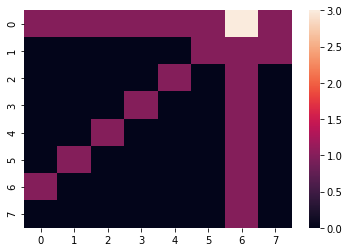

In [34]:
sns.heatmap(mc_0)

In [36]:
mc_1 = gera_matriz_coordenada(coord_0[1][0],coord_0[1][1], tamanho_tabuleiro=8, valor_posicao_rainha=3)
mc_1

array([[0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 3],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1]])

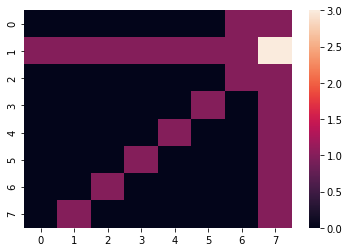

In [37]:
sns.heatmap(mc_1)

In [38]:
(mc_0 + mc_1)

array([[1, 1, 1, 1, 1, 1, 4, 2],
       [1, 1, 1, 1, 1, 2, 2, 4],
       [0, 0, 0, 0, 1, 0, 2, 1],
       [0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1]])